# Wildfire Prediction Dataset – Practice 1
**Name:** Supriya Pallisetty  
**Goal:** Load and explore the wildfire dataset using Pandas


In [3]:
import pandas as pd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wildfire_Dataset (1).csv to Wildfire_Dataset (1).csv


In [6]:
df = pd.read_csv('Wildfire_Dataset (1).csv')
df.head()

,Temperature,Humidity,Wind,Rain,Fire_Index
0,35.2,45,15.3,0.0,7.1
1,33.1,50,10.1,0.2,6.5
2,36.5,42,12.0,0.0,8.2
3,31.8,60,8.7,0.0,4.3
4,29.4,55,9.5,0.1,5.0


In [7]:
df.shape

(5, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  5 non-null      float64
 1   Humidity     5 non-null      int64  
 2   Wind         5 non-null      float64
 3   Rain         5 non-null      float64
 4   Fire_Index   5 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 332.0 bytes


In [9]:
df.describe()

,Temperature,Humidity,Wind,Rain,Fire_Index
count,5.00000,5.000000,5.000000,5.000000,5.000000
mean,33.20000,50.400000,11.120000,0.060000,6.220000
std,2.79732,7.300685,2.634768,0.089443,1.577023
min,29.40000,42.000000,8.700000,0.000000,4.300000
25%,31.80000,45.000000,9.500000,0.000000,5.000000
50%,33.10000,50.000000,10.100000,0.000000,6.500000
75%,35.20000,55.000000,12.000000,0.100000,7.100000
max,36.50000,60.000000,15.300000,0.200000,8.200000


In [10]:
df.isnull().sum()


,0
Temperature,0
Humidity,0
Wind,0
Rain,0
Fire_Index,0


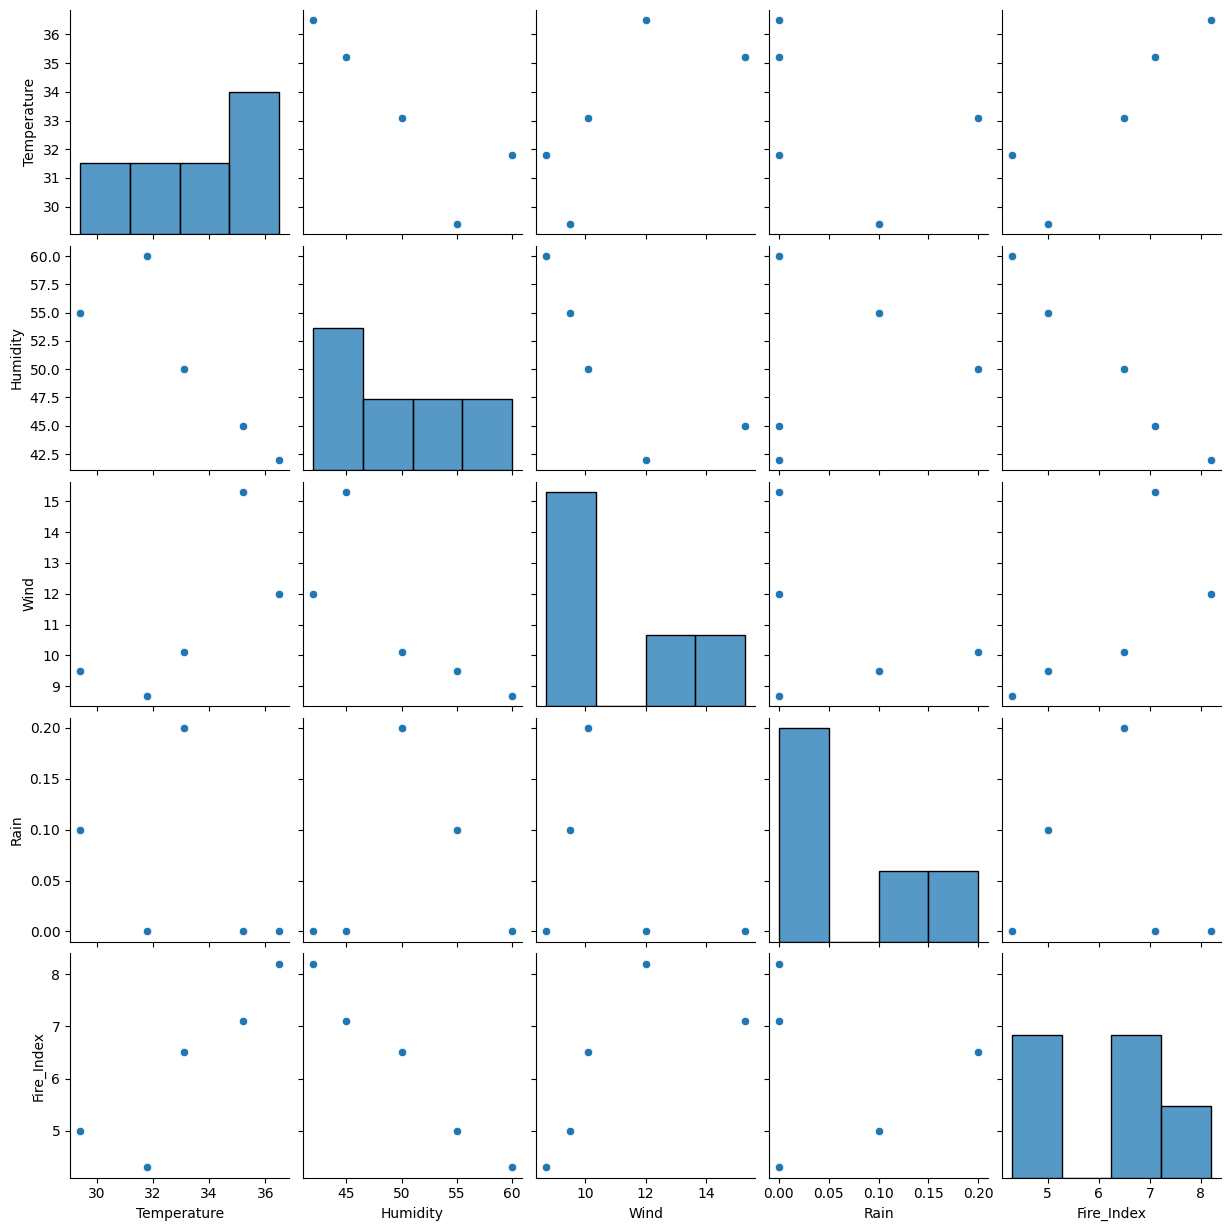

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairwise plots to explore relationships between variables
sns.pairplot(df)
plt.show()


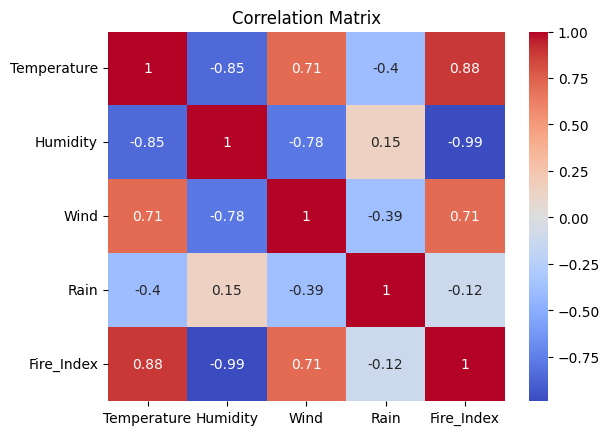

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:

X = df[['Temperature', 'Humidity', 'Wind']]
y = df['Fire_Index']


In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)




In [26]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [27]:

y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.010239747034328023
R² Score: 0.9817960052723057


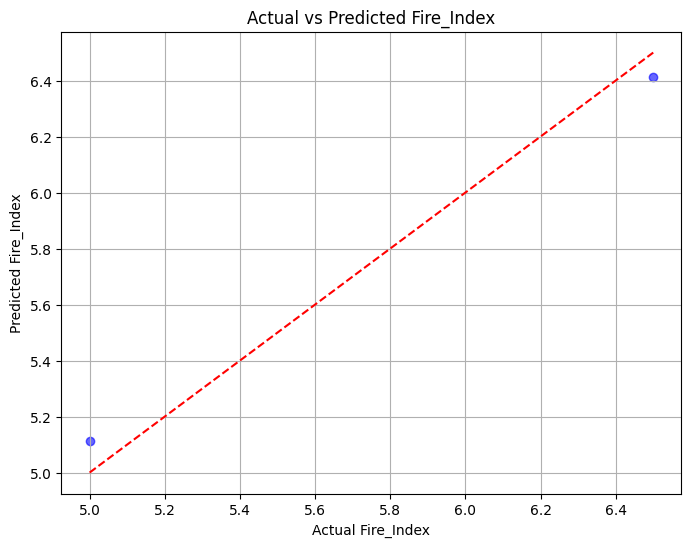

In [30]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Fire_Index')
plt.ylabel('Predicted Fire_Index')
plt.title('Actual vs Predicted Fire_Index')
plt.grid(True)
plt.show()
